In [25]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from IPython.display import Image
import math

In [16]:
class EquationState(TypedDict):
    a:int
    b:int
    c:int
    equation:str
    d:float
    res1:int
    res2:int

In [23]:
graph=StateGraph(EquationState)

In [17]:
def show_equation(state:EquationState)->EquationState:
    a=state['a']
    b=state['b']
    c=state['c']
    eq=f"{a}x^2 + {b}x + {c}"
    return {'equation':eq}
def calc_dis(state:EquationState)->EquationState:
    a=state['a']
    b=state['b']
    c=state['c']
    d=b**2 - 4*a*c
    return {'d':d}
def conditional_func(state:EquationState)->EquationState:
    d=state['d']
    if d>0:
        return "real_roots"
    elif d==0:
        return "repeated_roots"
    elif d<0:
        return "non_real_roots"
def non_real_roots(state:EquationState)->EquationState:
    return {'res1':'','res2':''}
def real_roots(state:EquationState)->EquationState:
    a=state['a']
    b=state['b']
    d=state['d']
    res1= (-b + math.sqrt(d))/(2*a)
    res2= (-b - math.sqrt(d))/(2*a)
    return {'res1':res1,'res2':res2}
def repeated_roots(state:EquationState)->EquationState:
    a=state['a']
    b=state['b']
    res=-b/2*a
    return {'res1':res,'res2':res}

In [24]:
graph.add_node("calculate_discriminant",calc_dis)
graph.add_node("show_equation",show_equation)
graph.add_node("non_real_roots",non_real_roots)
graph.add_node("real_roots",real_roots)
graph.add_node("repeated_roots",repeated_roots)

graph.add_edge(START,"show_equation")
graph.add_edge("show_equation","calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant",conditional_func,["real_roots","repeated_roots","non_real_roots"])


graph.add_edge("non_real_roots", END) 
graph.add_edge("real_roots", END)     
graph.add_edge("repeated_roots", END)

workflow=graph.compile()

In [27]:
output_state=workflow.invoke({"a":3,"b":5,"c":2})
output_state

{'a': 3,
 'b': 5,
 'c': 2,
 'equation': '3x^2 + 5x + 2',
 'd': 1,
 'res1': -0.6666666666666666,
 'res2': -1.0}

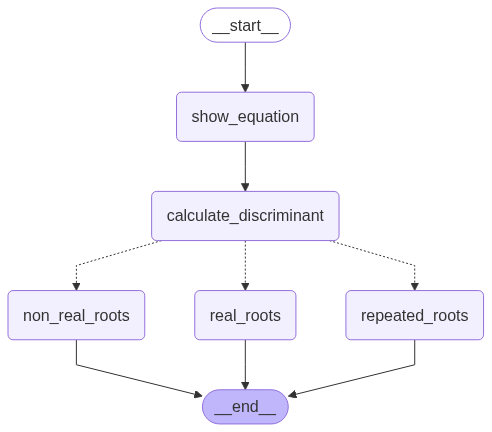

In [26]:
Image(workflow.get_graph().draw_mermaid_png())